In [3]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#importing the dataset
df = pd.read_csv("C:/Users/SIVAGAMI/Downloads/usedCars.csv")

In [5]:
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [ ]:
#checking the shape of the dataset
df.shape

(1064, 19)

In [108]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1064 non-null   int64         
 1   Model             1064 non-null   int64         
 2   Variant           1064 non-null   int64         
 3   FuelType          1064 non-null   int64         
 4   Colour            1064 non-null   int64         
 5   Kilometer         1064 non-null   int64         
 6   BodyStyle         1064 non-null   int64         
 7   TransmissionType  1064 non-null   int64         
 8   ManufactureDate   1064 non-null   datetime64[ns]
 9   ModelYear         1064 non-null   int64         
 10  CngKit            1064 non-null   int64         
 11  Price             1064 non-null   float64       
 12  Owner             1064 non-null   int64         
 13  DealerState       1064 non-null   int64         
 14  DealerName        1064 n

In [8]:
df.describe()

,Id,Kilometer,ModelYear,Warranty,QualityScore
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,568156.542293,52807.187970,2016.864662,0.738722,7.770207
std,16438.139974,33840.296979,2.996786,0.439538,0.719717
min,525978.000000,101.000000,2003.000000,0.000000,0.000000
25%,555321.500000,32113.500000,2015.000000,0.000000,7.500000
50%,572753.000000,49432.000000,2017.000000,1.000000,7.800000
75%,583072.750000,68828.500000,2019.000000,1.000000,8.100000
max,589122.000000,640000.000000,2023.000000,1.000000,9.400000


In [9]:
# Check for missing values
df.isnull().sum()

Id                     0
Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

In [10]:
#handling missing values 
# Impute numerical columns with mode
df['FuelType'].fillna(df['FuelType'].mode()[0], inplace=True)
df['TransmissionType'].fillna(df['TransmissionType'].mode()[0], inplace=True)
df['CngKit'].fillna('No', inplace=True)

C:\Users\SIVAGAMI\AppData\Local\Temp\ipykernel_11352\4185515502.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FuelType'].fillna(df['FuelType'].mode()[0], inplace=True)
C:\Users\SIVAGAMI\AppData\Local\Temp\ipykernel_11352\4185515502.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [11]:
df.isnull().sum()


Id                  0
Company             0
Model               0
Variant             0
FuelType            0
Colour              0
Kilometer           0
BodyStyle           0
TransmissionType    0
ManufactureDate     0
ModelYear           0
CngKit              0
Price               0
Owner               0
DealerState         0
DealerName          0
City                0
Warranty            0
QualityScore        0
dtype: int64

In [13]:
df['Price'] = df['Price'].str.replace(',', '', regex=False).str.replace(' Lakhs','', regex=False).astype(float)

In [15]:
#changing target column 'Price' to numeric
s = df['Price'].astype(str)
is_lakh = s.str.contains(r'\bLakhs\b', na=False)
vals = s.str.replace(r'[^\d.]', '', regex=True)            
nums = pd.to_numeric(vals, errors='coerce')
nums.loc[is_lakh] *= 1e5
df['Price'] = nums

In [16]:
#checked data type of 'Price' column
df['Price'].dtype


dtype('float64')

In [68]:
#dropped ID column
if 'ID' in df.columns:
	df.drop(columns=['ID'], inplace=True)

In [36]:
# Dropping high-cardinality & non-informative columns
df_model = df.drop(['DealerName', 'Model', 'Variant'], axis=1)


Feature engineering

In [23]:
#converting date column to datetime0
df['ManufactureDate'] = pd.to_datetime(df['ManufactureDate'])

In [24]:
#Created Car Age feature as it impacts resale value more than manufacturing year
df['CarAge'] = 2026 - df['ManufactureDate'].dt.year

Exploratory data analysis

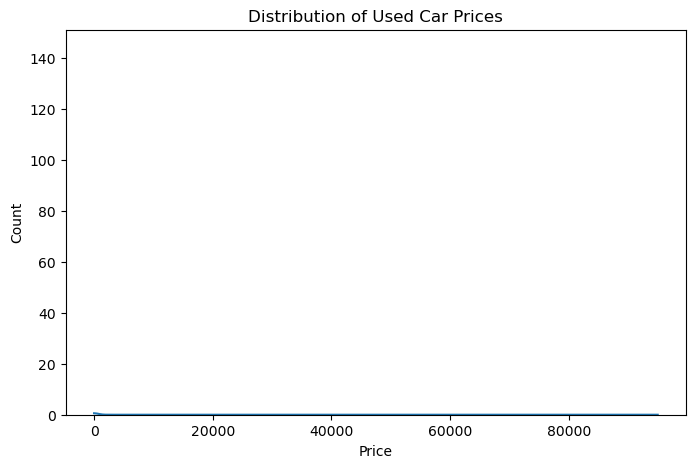

In [70]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Used Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


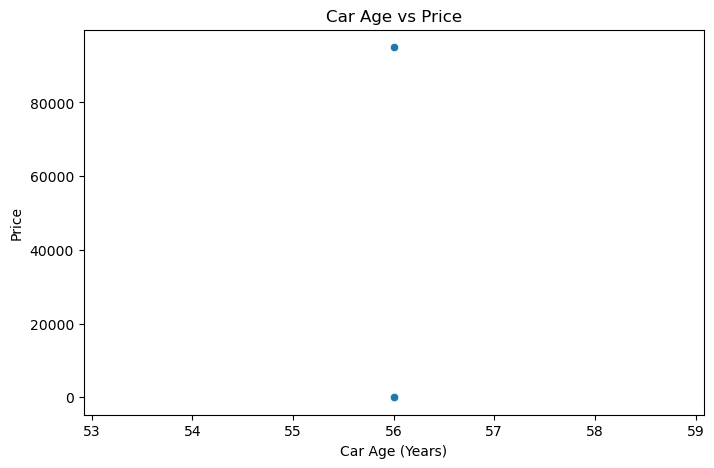

In [71]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='CarAge', y='Price', data=df)
plt.title("Car Age vs Price")
plt.xlabel("Car Age (Years)")
plt.ylabel("Price")
plt.show()


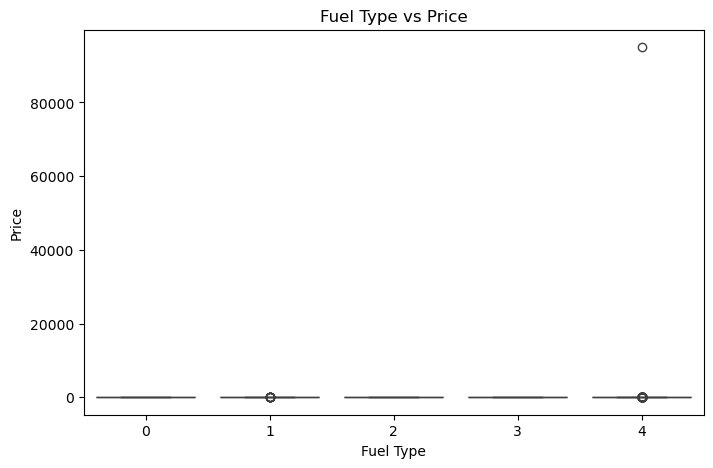

In [72]:
plt.figure(figsize=(8,5))
sns.boxplot(x='FuelType', y='Price', data=df)
plt.title("Fuel Type vs Price")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()


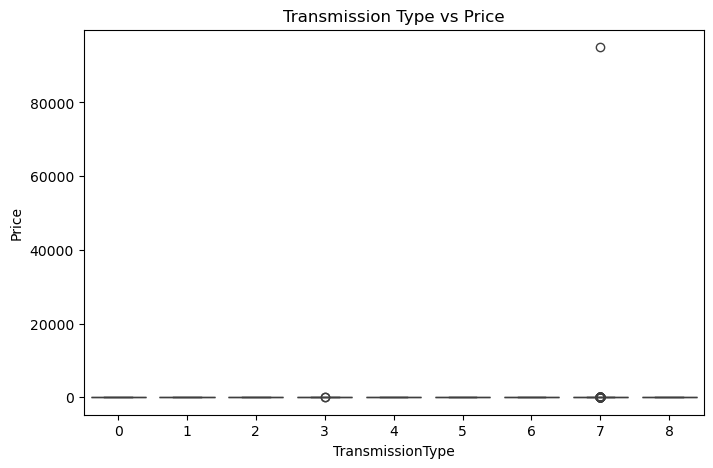

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='TransmissionType', y='Price', data=df)
plt.title("Transmission Type vs Price")
plt.show()


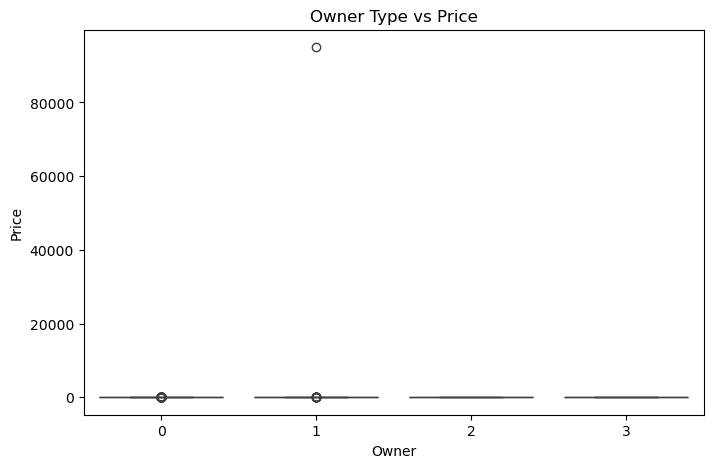

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Owner', y='Price', data=df)
plt.title("Owner Type vs Price")
plt.show()


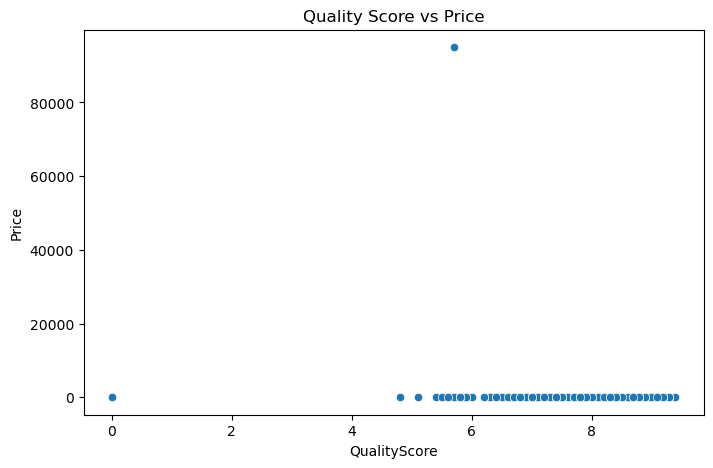

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='QualityScore', y='Price', data=df)
plt.title("Quality Score vs Price")
plt.show()


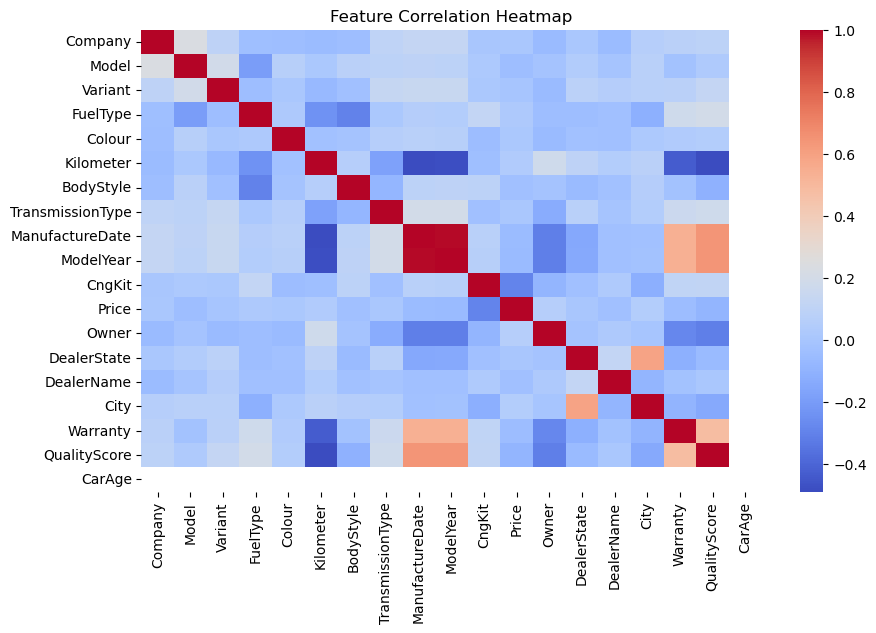

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [37]:
X = df_model.drop('Price', axis=1)
y = df_model['Price']

In [69]:
#encoding categorical variables
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

model selection


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:

lr_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)



In [47]:
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [59]:
print("Decision Tree Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R²:", r2_score(y_test, y_pred_dt))

print("\nRandom Forest Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))



print("Linear Regression Performance")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

Decision Tree Metrics:
MAE: 448.2814084507041
MSE: 42368453.829115495
R²: -1770936.5211817548

Random Forest Metrics:
MAE: 73.33283309859155
MSE: 786045.8535544849
R²: -32854.53211461238
Linear Regression Performance
MAE : 375.0934404374832
RMSE: 936.4702126618567
R2  : -36655.29439912076


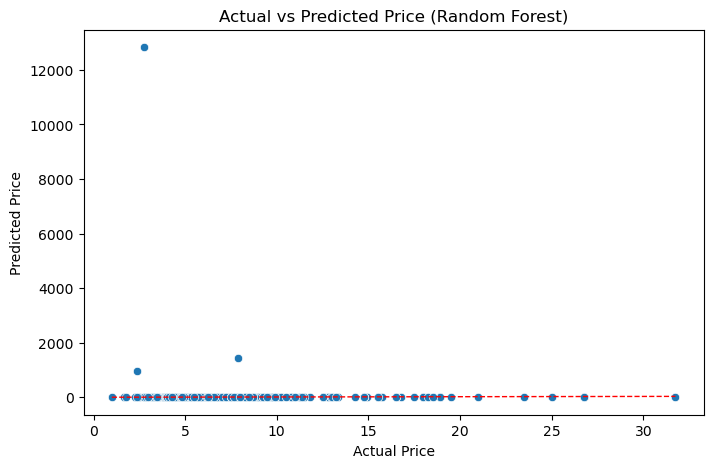

In [63]:
# ensure predictions exist (compute if cell order changed)
if 'y_pred_rf' not in globals():
	y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test.values, y=y_pred_rf)
# add 1:1 reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Random Forest)")
plt.show()

In [65]:
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
})

model_comparison

,Model,MAE,RMSE,R2 Score
0,Decision Tree,448.281408,6509.105455,-1.770937e+06
1,Random Forest,73.332833,886.592270,-3.285453e+04


In [77]:
# use the trained RandomForestRegressor 'rf' for feature importances
importances = getattr(rf, "feature_importances_", None)
if importances is None:
    raise ValueError("The trained RandomForestRegressor instance does not have 'feature_importances_'.")

# use the same feature names that were used for training
features = list(X.columns)

# If there's a length mismatch, try to align (e.g., drop ManufactureDate if still present)
if len(features) != len(importances):
    if 'ManufactureDate' in features:
        features.remove('ManufactureDate')
    # truncate to match model if still longer, or raise if shorter (unexpected)
    features = features[:len(importances)]
    if len(features) != len(importances):
        raise ValueError("Number of feature names does not match number of importances.")

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance

,Feature,Importance
0,QualityScore,0.203505
1,CngKit,0.201969
2,ModelYear,0.161299
3,Kilometer,0.159605
4,BodyStyle,0.101044
5,Company,0.057993
6,Colour,0.040604
7,FuelType,0.029579
8,DealerState,0.019649
9,City,0.012486


In [ ]:
#hyperparameter tuning for Random Forest model
from sklearn.model_selection import GridSearchCV

In [79]:
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [80]:
dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [81]:
dt_best = dt_grid.best_estimator_
dt_best


DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42)

In [ ]:
#hyperparameter tuning for decision tree model
def evaluate_model(model_name, y_true, y_pred):
	"""Evaluate and print model performance metrics"""
	mae = mean_absolute_error(y_true, y_pred)
	mse = mean_squared_error(y_true, y_pred)
	rmse = np.sqrt(mse)
	r2 = r2_score(y_true, y_pred)
	
	print(f"{model_name} Metrics:")
	print(f"MAE:  {mae:.4f}")
	print(f"MSE:  {mse:.4f}")
	print(f"RMSE: {rmse:.4f}")
	print(f"R²:   {r2:.4f}")

dt_best_pred = dt_best.predict(X_test)
evaluate_model("Tuned Decision Tree", y_test, dt_best_pred)


Tuned Decision Tree Metrics:
MAE:  448.4677
MSE:  42368453.1191
RMSE: 6509.1054
R²:   -1770936.4915


In [85]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [86]:
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [87]:
rf_grid.best_params_


{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [88]:
rf_best = rf_grid.best_estimator_

rf_best_pred = rf_best.predict(X_test)
evaluate_model("Tuned Random Forest", y_test, rf_best_pred)


Tuned Random Forest Metrics:
MAE:  98.3439
MSE:  496439.0878
RMSE: 704.5843
R²:   -20749.4057


In [ ]:

if 'y_pred_rf' not in globals():
    y_pred_rf = rf.predict(X_test)

comparison = pd.DataFrame({
    'Model': ['Random Forest (Default)', 'Random Forest (Tuned)'],
    'R2 Score': [
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, rf_best_pred)
    ]
})

comparison


,Model,R2 Score
0,Random Forest (Default),-32854.532115
1,Random Forest (Tuned),-20749.405740


In [ ]:
import joblib

if 'rf_best' in globals():
	best_rf_model = rf_best
elif 'rf' in globals():
	best_rf_model = rf
else:
	raise NameError("No trained RandomForestRegressor found (rf_best or rf). Train the model before saving.")


if 'scaler' not in globals():
	raise NameError("Scaler not found. Fit a scaler (e.g., StandardScaler) before saving.")

joblib.dump(best_rf_model, "used_car_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Loading model and scaler
model = joblib.load("used_car_price_model.pkl")
scaler = joblib.load("scaler.pkl")

In [96]:
st.set_page_config(page_title="Used Car Price Prediction", layout="centered")

st.title("🚗 Used Car Price Prediction App")
st.write("Predict the selling price of a used car")

2026-02-01 19:00:54.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:00:54.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:00:54.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:00:54.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:00:54.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [97]:
year = st.number_input("Year of Manufacture", min_value=1990, max_value=2025, value=2018)
kms_driven = st.number_input("Kilometers Driven", min_value=0, value=50000)
owners = st.selectbox("Number of Owners", [0, 1, 2, 3])
fuel_type = st.selectbox("Fuel Type", ["Petrol", "Diesel", "CNG", "Electric"])
transmission = st.selectbox("Transmission", ["Manual", "Automatic"])


2026-02-01 19:01:05.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:01:05.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:01:05.385 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:01:05.385 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:01:05.386 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:01:05.386 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:01:05.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:01:05.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [98]:
fuel_map = {"Petrol": 0, "Diesel": 1, "CNG": 2, "Electric": 3}
trans_map = {"Manual": 0, "Automatic": 1}

In [99]:
fuel_type = fuel_map[fuel_type]
transmission = trans_map[transmission]

In [ ]:
car_age = 2025 - year

# Creating input dataframe
input_data = pd.DataFrame([[car_age, kms_driven, owners, fuel_type, transmission]],
                          columns=["car_age", "kms_driven", "owners", "fuel_type", "transmission"])

In [ ]:
expected_cols = list(X.columns)

# Prepare sensible defaults from the training dataframe (median for numeric, mode otherwise)
defaults = {}
for col in expected_cols:
	if col in df_model.columns:
		if pd.api.types.is_numeric_dtype(df_model[col]):
			defaults[col] = df_model[col].median()
		else:
			defaults[col] = df_model[col].mode()[0]
	else:
		defaults[col] = 0  # fallback

input_full = pd.DataFrame([defaults])

# Map the small input_data to the training feature names and overwrite defaults
mapping = {
	'car_age': 'CarAge',
	'kms_driven': 'Kilometer',
	'owners': 'Owner',
	'fuel_type': 'FuelType',
	'transmission': 'TransmissionType'
}
for src, dst in mapping.items():
	if src in input_data.columns and dst in input_full.columns:
		input_full.loc[0, dst] = input_data.loc[0, src]

# Ensure column order matches scaler's expected order
input_full = input_full[expected_cols]

# Droped ManufactureDate if present, to match scaler/model input
if 'ManufactureDate' in input_full.columns:
	input_full = input_full.drop(columns=['ManufactureDate'])

# Converting datetime columns to numeric so StandardScaler can process them.
# StandardScaler was fitted on numeric arrays; datetime64[ns] must be converted to integers/floats.
for col in input_full.columns:
	if pd.api.types.is_datetime64_any_dtype(input_full[col]):
		# represent datetime as integer nanoseconds since epoch, then convert to float
		input_full[col] = input_full[col].astype('int64').astype(float)

# Scale and predict
input_scaled = scaler.transform(input_full)

# picking the trained RF model available
if 'best_rf_model' in globals():
	clf = best_rf_model
elif 'rf_best' in globals():
	clf = rf_best
elif 'rf' in globals():
	clf = rf
elif 'model' in globals():
	clf = model
else:
	raise NameError("No trained RandomForestRegressor found (rf/rf_best/best_rf_model/model).")

pred_price = clf.predict(input_scaled)[0]
print(f"Predicted price: {pred_price:.2f}")

Predicted price: 17.24


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [105]:
if st.button("Predict Price"):
    prediction = model.predict(input_scaled)[0]
    st.success(f"💰 Estimated Car Price: ₹ {int(prediction):,}")

2026-02-01 19:12:47.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:12:47.819 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:12:47.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:12:47.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 19:12:47.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [107]:
# Install required packages using Jupyter magic command
%pip install streamlit joblib pandas numpy scikit-learn

# To run the Streamlit app, use the following command in your terminal (not in Jupyter):
# streamlit run app.py

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
